Finding the Best Markets to Advertise In
===

For this project, we are assuming that we are working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement. Our goal in this project is to find out the two best markets to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first. For this project, we will be using freeCodeCamp's 2017 New Coder Survey as our sample data.

In [1]:
import pandas as pd
survey = pd.read_csv("https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv", low_memory=0)
survey.shape

(18175, 136)

In [2]:
pd.options.display.max_columns = 150
survey.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

It looks like the columns are self-explanatory.

Checking for Sample Representativity
---

We want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

* Where are these new coders located?
* What are the locations with the greatest number of new coders?
* How much money new coders are willing to spend on learning?

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose.

In [3]:
(survey["JobRoleInterest"].value_counts(normalize=True)*100).head(20)

Full-Stack Web Developer                                                       11.770595
  Front-End Web Developer                                                       6.435927
  Data Scientist                                                                2.173913
Back-End Web Developer                                                          2.030892
  Mobile Developer                                                              1.673341
Game Developer                                                                  1.630435
Information Security                                                            1.315789
Full-Stack Web Developer,   Front-End Web Developer                             0.915332
  Front-End Web Developer, Full-Stack Web Developer                             0.800915
  Product Manager                                                               0.786613
Data Engineer                                                                   0.758009
  User Experience Des

It looks like, some people are interested in more than one subject. The focus of our courses is on web and mobile development. Let's see how many people are interested in at least one of these two subjects.

In [10]:
interests_no_nulls = survey['JobRoleInterest'].dropna()
splitted_interests = interests_no_nulls.str.split(',')

In [11]:
n_of_options = splitted_interests.apply(lambda x: len(x))
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It looks like 32% of the people have clear idea about their job interest. Whereas 68% of the people are interested more than one subject.
Since we are interested in web and mobile development courses, let's see their proportion.

In [12]:
web_or_mobile = interests_no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

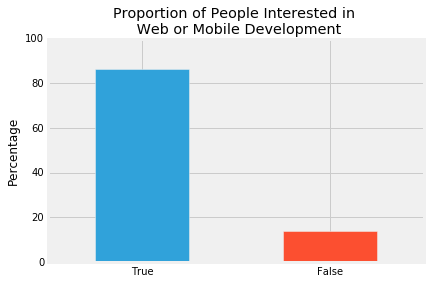

In [21]:
freq_table.plot.bar(title="Proportion of People Interested in \n Web or Mobile Development", rot=0)
plt.ylabel("Percentage")
plt.ylim(0,100);

As we can see from the plot above, significant amount of people (86%) are interested in web or mobile development. Therefore, this sample is representitive for our analysis.

Locations and Densities
---

The "CountryCitizen" variable describes the country of origin for each participant, and the "CountryLive" variable describes what country each participants lives in. For our analysis, we'll work with the CountryLive variable because we're interested where people actually live at the moment when we run the ads.

We will begin with dropping the rows where participants didn't answer what role they are interested in.

In [22]:
fcc_good = survey[survey["JobRoleInterest"].notnull()].copy()

In [24]:
absolute = fcc_good["CountryLive"].value_counts()
relative = fcc_good["CountryLive"].value_counts(normalize=True)

In [28]:
c_freq_df = pd.DataFrame(data={"Asolute_Frequency":absolute,
                            "Relative_Frequency": relative})

In [29]:
c_freq_df

,Asolute_Frequency,Relative_Frequency
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


Based on the results, almost half of the participants live in the US, with 45.7% followed by India with 7.7%. It would be reasonable to choose USA and India to advertise in. However, we should go more in depth with our analysis. We should look if these participants are willing to spend for learning.

Spending Money For Learning
---

We can continue by figuring out how much money new coders are actually willing to pay for our e-learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.
We're interested in finding out how much money each student spends per month. We will narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada.

Let's start with a new column that describes the amount of money a student has spent per month.

In [30]:
fcc_good["MonthsProgramming"].replace(0,1,inplace=True)

In [31]:
fcc_good["money_per_month"] = fcc_good["MoneyForLearning"]/fcc_good["MonthsProgramming"]

In [32]:
fcc_good["money_per_month"].isnull().sum()

675

In [33]:
fcc_good = fcc_good[fcc_good["money_per_month"].notnull()]

In [34]:
fcc_good = fcc_good[fcc_good["CountryLive"].notnull()]

In [40]:
fcc_selected = fcc_good[fcc_good["CountryLive"].isin(['United States of America',
                            'India', 'United Kingdom', 'Canada'])]

In [41]:
fcc_selected["CountryLive"].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [48]:
fcc_selected.groupby("CountryLive")["money_per_month"].mean().sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

The results for the United Kingdom and Canada are lower than India which is surprising. If we considered the socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

In this case, we might have some outliers for India or we don't have enough data for Canada and UK. This can effect the mean values for India, UK and Canada. We should do more inspection on this data.

Dealing with Extreme Outliers
---

Let's see if we have some outliers for money per month column.

In [78]:
countries4 = fcc_good[fcc_good["CountryLive"].str.contains('United States of America|India|United Kingdom|Canada')]

In [79]:
countries4["CountryLive"].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

In [80]:
import seaborn as sns

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


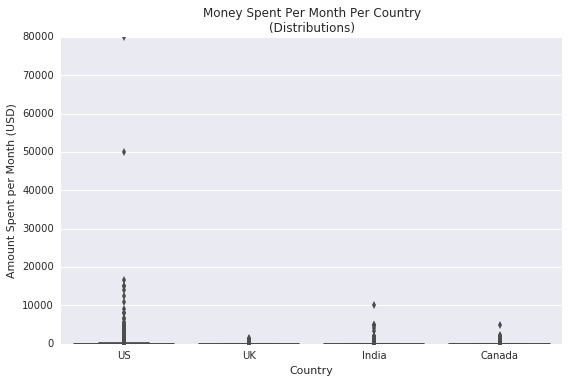

In [81]:
sns.boxplot(y="money_per_month", x="CountryLive", data=countries4)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.ylabel("Amount Spent per Month (USD)")
plt.xlabel("Country")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

As we can see from the box plot above, we have extreme outliers for the US. To avoid them, we will eliminate them, so will remove the amount values lower than 6000.

In [85]:
countries4_less = countries4[countries4["money_per_month"] < 6000].copy()

In [86]:
countries4_less.groupby("CountryLive")["money_per_month"].mean().sort_values(ascending=False)

CountryLive
United States of America    142.654608
India                       113.748387
Canada                      113.510961
United Kingdom               45.534443
Name: money_per_month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


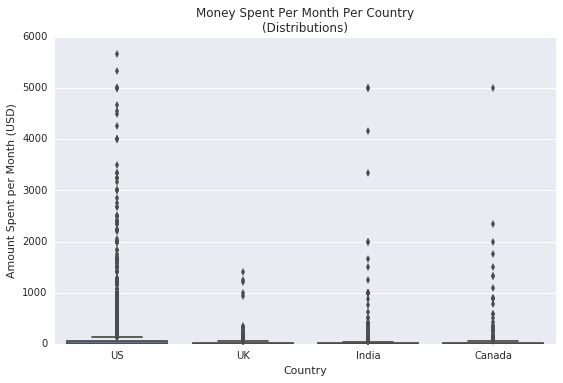

In [87]:
sns.boxplot(y="money_per_month", x="CountryLive", data=countries4_less)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.ylabel("Amount Spent per Month (USD)")
plt.xlabel("Country")
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

We still have too many outliers. We should examine their answers to figure out the reason behind these big expenses. We can look whether they attended any bootcamp, which might explain the large amount of money spent.

In [106]:
outliers_india = countries4[(countries4["CountryLive"] == 'India') &
                      (countries4["money_per_month"] > 1000)]

In [107]:
outliers_india["AttendedBootcamp"].value_counts()

0.0    10
1.0     1
Name: AttendedBootcamp, dtype: int64

In India, from the participants who paid more than 1000$ per month, only 1 person attanded to a bootcamp.

In [108]:
outliers_usa = countries4[(countries4["CountryLive"] == 'United States of America') &
                      (countries4["money_per_month"] > 1000)]

In [109]:
outliers_usa["AttendedBootcamp"].value_counts()

1.0    72
0.0    47
Name: AttendedBootcamp, dtype: int64

In the US, from the participants who paid more than 1000$ per month, 72 people attanded to a bootcamp.

In [111]:
outliers_usa[outliers_usa["money_per_month"]>2500]["AttendedBootcamp"].value_counts()

1.0    26
0.0    18
Name: AttendedBootcamp, dtype: int64

In the US, from the participants who paid more than 2500$ per month, 26 people attanded to a bootcamp.

In [112]:
countries4_less_1000 = countries4[countries4["money_per_month"] < 1000].copy()

In [114]:
countries4_less_1000.groupby("CountryLive")["money_per_month"].mean().sort_values(ascending=False)

CountryLive
United States of America    55.362155
Canada                      46.934471
India                       30.709658
United Kingdom              28.560399
Name: money_per_month, dtype: float64

If we look at the majority of people who spent less than 1000$, the average money spent per month is much lower than our initial analysis.

Considering the results we've found so far, we can say that we should advertise in is the US. There are a lot of new coders living there and it looks like they are willing to pay a good amount of money each month.

We need to choose one more market though.

In [116]:
countries4_less_1000["CountryLive"].value_counts(normalize=True)*100

United States of America    74.660272
India                       11.830536
United Kingdom               7.327471
Canada                       6.181721
Name: CountryLive, dtype: float64

So far, it looks like Canada is a good opiton to advertise in as it seems like they are willing pay a good amount of money, however there are good chances that India might actually be a better choice because they have large amount of potential customers.

In [119]:
means = pd.DataFrame(countries4_less_1000.groupby("CountryLive")["money_per_month"].mean().sort_values(ascending=False))

In [123]:
means.reset_index(inplace=True)

In [129]:
means.rename(columns={"CountryLive":"Country"}, inplace=True)

In [130]:
means

,Country,money_per_month
0,United States of America,55.362155
1,Canada,46.934471
2,India,30.709658
3,United Kingdom,28.560399


In [121]:
counts = pd.DataFrame(countries4_less_1000["CountryLive"].value_counts(normalize=True)*100)

In [124]:
counts.reset_index(inplace=True)

In [132]:
counts.rename(columns={"index":"Country","CountryLive":"Counts"}, inplace=True)

In [133]:
counts

,Country,Counts
0,United States of America,74.660272
1,India,11.830536
2,United Kingdom,7.327471
3,Canada,6.181721


In [135]:
countries4 = counts.merge(means, on="Country")

In [136]:
countries4["z_scores"] = (59-countries4["money_per_month"])/countries4["money_per_month"].std(ddof=0)

In [137]:
countries4

,Country,Counts,money_per_month,z_scores
0,United States of America,74.660272,55.362155,0.325169
1,India,11.830536,30.709658,2.528737
2,United Kingdom,7.327471,28.560399,2.720849
3,Canada,6.181721,46.934471,1.078479


In conclusion, it looks like it's best to advertise in the US, and for our second market choice, India or Canada might be a good option to advertise in. At this point, we can send our results to the marketing team, as they have more domain knowledge and might have a better decesion to choose between the two markets.